In [1]:
## Dealing with missing, or invalid, values is an essential part of doing data science.
## As such, it is pivotal to dedicate some time to learn about how to deal with this kind of situations.

In [2]:
import pandas as pd
from io import StringIO

# Dummy table with two missing values
csv_data = """A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,"""

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
# A quick way to check whether, and which, rows contain null/NaN values:

df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
## SciKit-Learn was built to use NumPY arrays, in general, so Pandas integration is patchy.
## However, the Pandas dataframes allow to access the NumPY representation pretty easily:

df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [5]:
## Method number one to deal with missing values: drop the row

print(df.dropna(axis=0))  # Axis=0 => Drop the *rows*
print(df.dropna(axis=1))  # Axis=1 => Drop the *columns*
print(df.dropna(axis=0, how="all"))  # how="all" => drop only rows (axis=0) where *all* values are NaN
print(df.dropna(axis=1, thresh=3))  # thresh=3 => drop columns (axis=1) where less than three values are real
print(df.dropna(axis=0, subset=["C"]))  # subset=['C'] => only drop rows where column C is NaN

     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


In [6]:
## Removing missing data can be a good choice if the dataset is big and the size of data loss is well contained.
## For small datasets like our dummy example, though, this is often not a good choice - we lose
## too much data to make any analysis, or machine learning technique, function reliably.

## Alternative method one: IMPUTE the missing value.

from sklearn.preprocessing import Imputer

# Now we are going to create an imputer which will substitute the missing value with the *mean* of the *column*
imr = Imputer(missing_values="NaN", strategy="mean", axis=0)  # Axis=0: *COLUMN*
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [7]:
# Now we are going to create an imputer which will substitute the missing value with the *mean* of the *row*
imr = Imputer(missing_values="NaN", strategy="mean", axis=1)  # Axis=1: *ROW*
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

In [8]:
# Now we are going to create an imputer which will substitute the missing value with the *median* of the *row*
imr = Imputer(missing_values="NaN", strategy="median", axis=1)  # Axis=1: *ROW*
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  6.,  8.],
       [10., 11., 12., 11.]])

In [9]:
# Working with categorical data

# T-shirt dataset
df = pd.DataFrame([
    ["green", "M", 10.1, "class1"],
    ["red", "L", 13.5, "class2"],
    ["blue", "XL", 15.3, "class1"]
])

df.columns = ["color", "size", "price", "classlabel"]
## This toy dataset has a categorical column (color),
## an ordinal column (size), and a numerical column (price)
print(df)

   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1


In [10]:
## Let us define the correct order of sizes

size_mapping = {"XL": 3, "L": 2, "M": 1, "S": 0}
df["size"] = df["size"].map(size_mapping)
print(df)

## We also have to convert the class labels, as it is best practice for them to be integers.
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df["classlabel"]))}
df["classlabel"] = df["classlabel"].map(class_mapping)
print(df)
print()

# Put back the class labels
inv_class_mapping = {v: k for k,v in class_mapping.items()}
df["classlabel"] = df["classlabel"].map(inv_class_mapping)
print(df)

## Alternative: just use SKLearn

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df["classlabel"].values)
print(y)                           
print(class_le.inverse_transform(y))

   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1
   color  size  price  classlabel
0  green     1   10.1           0
1    red     2   13.5           1
2   blue     3   15.3           0

   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1
[0 1 0]
['class1' 'class2' 'class1']


/usr/users/ga002/venturil/miniconda3/envs/py360/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
## Changing the class labels to arbitrary numerical values does not pose problems, as they are the targets
## However, changing the color label to a numerical value might fool the algorithms into thinking
## that e.g. red is smaller than blue, leading to suboptimal results. 
## An alternative for this kind of categorical data is to convert it to three different binary features
## This technique is called *One-hot encoding*
## SKLearn conveniently provides functions to perform such an operation quickly.

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])  # Tell the OHE that the categorical column(s) index is [0]

## OHE only functions, though, with NUMERICAL DATA
X = df[["color", "size", "price"]].values  # NumPY representation

color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])

print(X)

ohe.fit_transform(X).toarray()
# Now we have unpacked the three categorical values into three columns.
# Note that fit_transform returns a SPARSE matrix, which is often desirable!
# The "toarray" method should NOT be called unless dense rather than sparse matrices are required
# (which is the case for visualization)

[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]]


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [12]:
# An alternative and more convenient method is contained in pandas

pd.get_dummies(df[["price", "color", "size"]])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [13]:
# We can also lose ONE of the categorical columns, reducing memory requirements and making 
# certain matrix operations (such as inversion) easier

pd.get_dummies(df[["price", "color", "size"]], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [14]:
# Now let us start working with a different dataset, the Wine dataset from UCI

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
                header=None)
df_wine.columns = ["Class label",
                   "Alcohol",
                   "Malic acid",
                   "Ash",
                   "Alcalinity of ash",
                  "Magnesium",
                  "Total phenols",
                  "Flavanoids",
                  "Nonflavanoid phenols",
                  "Proanthocyanins",
                  "Color intensity",
                  "Hue",
                  "OD280/OD315 of diluted wines",
                  "Proline"]
print("Class labels", np.unique(df_wine["Class label"]))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
# Random split the dataset in train and test partitions

from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [16]:
# It is essential, for scale-sensitive algorithms (all we have seen so far except Decision and Random Trees)
# That we scale the data so that everything is comparable.
# The two most common methods for scaling are normalization and standardization.
# "Normalisation" generally refers to bringing all the data in a feature to a range of 0-1 (see Mikado!)
# Usually this is performed using a min-max scaling procedure

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

## However, for many ML algorithms, it is best to use STANDARDIZATION instead, as many would use initial
## weights near to 0 - therefore potentially biasing the algorithms towards the lower end of the features.

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [17]:
# Another important choice regards, for algorithms that support it, the type of regularization.
# There are two types of common regularization: L2 (more common, quadratic, applicable by most algorithms)
# and L1 (less common, linear, often returns sparse matrices, not supported by all algorithms)

# L1 is interesting because, as it often returns sparse vectors with many values set to 0, it can
# help pinpoint which features in the model are negligible.

# We will see this on the wine dataset.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty="l1", C=1.0)  # Very low C, ie we are regularising aggressively
lr.fit(X_train_std, y_train)
print("Training accuracy", lr.score(X_train_std, y_train))
print("Test accuracy", lr.score(X_test_std, y_test))

Training accuracy 1.0
Test accuracy 1.0


In [18]:
# The LR did a perfect job using the L1. Let's see the intercepts for the three classes:

print(lr.intercept_)

[-1.26417321 -1.21584135 -2.37158748]


In [19]:
# Now let us see the coefficient of each class:

print(lr.coef_)

# We will note that the array is sparse, ie many values are set to 0. So many of the features have
# ended up being considered irrelevant for the classification.

[[ 1.24672868  0.18042319  0.74704822 -1.16483038  0.          0.
   1.15890655  0.          0.          0.          0.          0.55973953
   2.5079943 ]
 [-1.53752919 -0.38731566 -0.99548852  0.36527008 -0.05970602  0.
   0.66812876  0.          0.         -1.93439181  1.23300407  0.
  -2.23086809]
 [ 0.13491739  0.1693984   0.35731901  0.          0.          0.
  -2.43447167  0.          0.          1.56251802 -0.81781082 -0.49684465
   0.        ]]


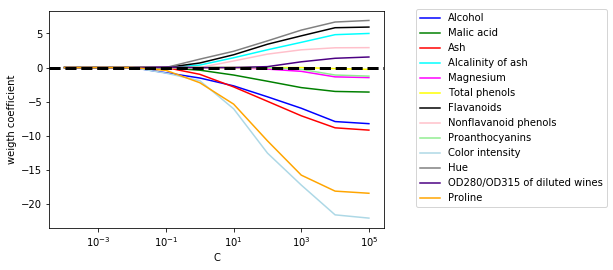

In [20]:
# If we had increased the regularization strength (ie lower values of C) the array would have been even
# sparser. We can analyse and plot this:

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black",
          "pink", "lightgreen", "lightblue", "gray", "indigo", "orange"]

weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty="l1", C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:,column], label=df_wine.columns[column+1], color=color)
    continue
    
plt.axhline(0, color="k", linestyle="--", linewidth=3)
# plt.xlim([10**(-5), 10**5])
plt.ylabel("weigth coefficient")
plt.xlabel("C")
plt.xscale("log")
plt.legend(loc="best")
ax.legend(loc="upper center", bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [21]:
# We can use a technique, Sequential Backward Selection, to progressively drop features
# that contribute little to the efficiency of the classifiers. The steps are as function:
# 0. Determine a maximum number of features to keep, K.
# 1. Initialize the algorithm with k (number of retained features) = d (dimensionality of the feature space X_d)
# 2. Define a criterion function J which has to be minimised.
# 3. Determine the feature x^_ which maximises:
#   x^_ = argmax J(X_k - x), x in X_k.
# 4. Drop x^_ from X_k: X_(k -1) = X_k - x^_; k := k -1
# 5. Repeat until k = K.

# SBS is not implemented in SKLearn, so we will implement it manually.

from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

class SBS:
    
    def __init__(self, estimator,
                 k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                           test_size=self.test_size,
                                                           random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
            self.k_score_ = self.scores_[-1]
        return self
        
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
        
        

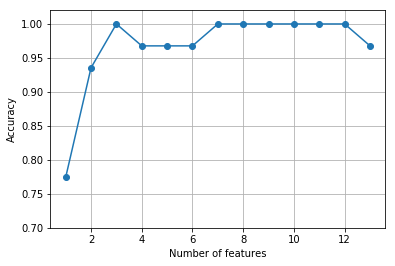

In [24]:
# Let's see the SBS implementation in action with the KNN classifier:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker="o")
plt.ylim([0.7, 1.02])
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.grid()
plt.show()


In [27]:
# An optimal accuracy was obtained by using only three features. We can see what features have been selected
# in that one:

k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

k7 = list(sbs.subsets_[6])
print(df_wine.columns[1:][k7])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')
Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Total phenols',
       'Nonflavanoid phenols', 'OD280/OD315 of diluted wines'],
      dtype='object')


In [28]:
# Now let us see the performance of the original KNN on the dataset

knn.fit(X_train_std, y_train)
print("Training accuracy:", knn.score(X_train_std, y_train))
print("Testing accuracy:", knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Testing accuracy: 0.9814814814814815


In [30]:
# Now let us see after our feature selection
knn.fit(X_train_std[:,k3], y_train)
print("Training accuracy:", knn.score(X_train_std[:,k3], y_train))
print("Testing accuracy:", knn.score(X_test_std[:,k3], y_test))

Training accuracy: 0.9516129032258065
Testing accuracy: 0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


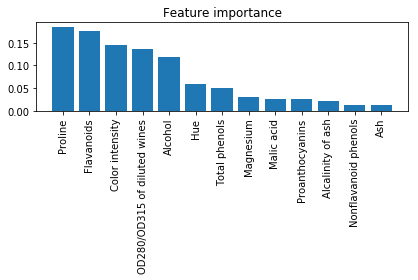

In [35]:
# Of course, one of the most straightforward methods in SKLearn to rank features by importance is
# to use RandomForestClassifiers and use the .feature_importances_ parameter.
# As RandomForests are scale-invariant, we can use directly the raw data

from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
plt.title("Feature importance")    
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [38]:
# We can also instruct SKLearn to simplify the model by taking only the most important features
# that had been found as important by the RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print("Number of samples that meet this criterion:", X_selected.shape[0])
for f in range(X_selected.shape[1]):
    print("{0:2d}) {2} {3:.4f}".format(f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of samples that meet this criterion: 124
 1) Proline 0.1855
 2) Flavanoids 0.1748
 3) Color intensity 0.1439
 4) OD280/OD315 of diluted wines 0.1362
 5) Alcohol 0.1185
